# *Classification of Case Resolution Time: Categorizing Cases into Time-Based Categories*
*We employ a classification approach to categorize a specific subset of our data based on the duration it takes for a case to be resolved. The data is divided into five distinct categories: 1-100 days, 100-500 days, 500-1000 days, 1000-1500 days, and 1500+ days.*

## *Features Used for Classification*
1. State Code: The code representing the state where the case is being heard.
2. District Code: The code indicating the specific district within the state where the case is being heard.
3. Court Number: The number identifying the court where the case is being heard.
4. Judge Position: The position or rank of the judge presiding over the case.
5. Gender of Defendant's Advocate: The gender of the lawyer representing the defendant.
6. Gender of Petitioner's Advocate: The gender of the lawyer or advocate representing the petitioner.
7. Case Type: The type or category of the case (e.g., criminal, civil, family law).
8. Case Purpose: The intended purpose or objective of the case.
9. Disposition Name: The specific name or label representing the case disposition (e.g., conviction, acquittal).
10. Act: The relevant act or legislation associated with the case.
11. Section: The specific section of the act or legislation relevant to the case.
12. Number of Sections IPC: The number of sections of the Indian Penal Code (IPC) applicable to the case (for cases in India).


## *Model Used for Classification*
*The random forest classification model is chosen due to its distinct advantages over other models. By incorporating randomness and independence in the model, it offers several benefits. Random forests excel at handling high-dimensional data and are less prone to overfitting compared to other models.*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/court-data/judges_clean/judges_clean.csv
/kaggle/input/court-data/acts_sections/acts_sections.csv
/kaggle/input/court-data/cases/cases/cases_2015.csv
/kaggle/input/court-data/cases/cases/cases_2012.csv
/kaggle/input/court-data/cases/cases/cases_2018.csv
/kaggle/input/court-data/cases/cases/cases_2013.csv
/kaggle/input/court-data/cases/cases/cases_2017.csv
/kaggle/input/court-data/cases/cases/cases_2010.csv
/kaggle/input/court-data/cases/cases/cases_2014.csv
/kaggle/input/court-data/cases/cases/cases_2016.csv
/kaggle/input/court-data/cases/cases/cases_2011.csv
/kaggle/input/court-data/keys/keys/type_name_key.csv
/kaggle/input/court-data/keys/keys/cases_district_key.csv
/kaggle/input/court-data/keys/keys/act_key.csv
/kaggle/input/court-data/keys/keys/disp_name_key.csv
/kaggle/input/court-data/keys/keys/purpose_name_key.csv
/kaggle/input/court-data/keys/keys/cases_state_key.csv
/kaggle/input/court-data/keys/keys/section_key.csv
/kaggle/input/court-data/keys/keys/cases_court_

## *Libraries*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## *Data*
Importing the pre-processed data file into the notebook

In [4]:
cases = pd.read_csv("/kaggle/input/data-preprocessing-2/preprocessed_3yrs_cases.csv")
cases

,ddl_case_id,state_code,dist_code,court_no,judge_position,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,case_duration,act,section,number_sections_ipc
0,01-01-03-201500000012016,1,1,3,district and sessions court,0,0,6112.0,1838.0,4,978.0,17353.0,762473.0,1.0
1,01-01-03-201500000032016,1,1,3,district and sessions court,1,0,6112.0,4776.0,4,512.0,17353.0,762473.0,1.0
2,01-01-03-201500000102016,1,1,3,district and sessions court,1,0,6112.0,767.0,4,877.0,17353.0,773491.0,5.0
3,01-01-03-201500000122016,1,1,3,district and sessions court,1,0,6112.0,1838.0,4,855.0,17353.0,940277.0,4.0
4,01-01-03-201500000162016,1,1,3,district and sessions court,1,0,6112.0,4776.0,31,410.0,17353.0,954558.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73039,32-01-01-213410000132018,32,1,1,principal district and sessions court,0,0,6540.0,7419.0,4,203.0,17353.0,954558.0,1.0
73040,32-01-01-213410000142018,32,1,1,principal district and sessions court,0,0,6540.0,2975.0,4,84.0,17353.0,954558.0,2.0
73041,32-01-01-213410000152018,32,1,1,principal district and sessions court,0,0,6540.0,840.0,4,190.0,17353.0,954558.0,2.0
73042,32-01-01-214010000092018,32,1,1,principal district and sessions court,0,0,5936.0,7419.0,4,339.0,17353.0,762473.0,2.0


In [5]:
cases.describe()

,state_code,dist_code,court_no,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,case_duration,act,section,number_sections_ipc
count,73044.000000,73044.000000,73044.000000,73044.000000,73044.000000,73044.000000,73044.000000,73044.000000,73044.000000,73044.0,7.304400e+04,73044.00000
mean,10.978451,16.966281,5.792659,0.040989,0.072669,2447.524656,3634.284774,18.995646,158.394995,17353.0,9.395788e+05,3.51725
std,6.988090,12.808134,7.167184,0.198266,0.259593,2148.042552,1891.538845,16.127686,250.344041,0.0,1.925002e+05,2.28179
min,1.000000,1.000000,1.000000,0.000000,0.000000,12.000000,8.000000,1.000000,1.000000,17353.0,3.706000e+03,1.00000
25%,7.000000,5.000000,1.000000,0.000000,0.000000,723.000000,1878.000000,5.000000,9.000000,17353.0,7.734910e+05,2.00000
50%,9.000000,15.000000,2.000000,0.000000,0.000000,1877.000000,4342.000000,11.000000,27.000000,17353.0,9.656930e+05,3.00000
75%,14.000000,24.000000,8.000000,0.000000,0.000000,5189.000000,4889.000000,31.000000,208.000000,17353.0,1.087311e+06,5.00000
max,32.000000,76.000000,61.000000,1.000000,1.000000,7531.000000,8743.000000,52.000000,1608.000000,17353.0,1.345422e+06,25.00000


#### *'case_duration' column has continuous values. The values should be grouped together*

In [6]:
# Creating a list of category labels and the corresponding bin edges
# categories = ['<100', '100-500', '500-1000', '1000-1500', '1500+']
categories = [1, 2, 3, 4, 5]
bins = [0, 100, 500, 1000, 1500, float('inf')]

cases['duration_category'] = pd.cut(cases['case_duration'], bins=bins, labels=categories).astype(int)

cases

,ddl_case_id,state_code,dist_code,court_no,judge_position,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,case_duration,act,section,number_sections_ipc,duration_category
0,01-01-03-201500000012016,1,1,3,district and sessions court,0,0,6112.0,1838.0,4,978.0,17353.0,762473.0,1.0,3
1,01-01-03-201500000032016,1,1,3,district and sessions court,1,0,6112.0,4776.0,4,512.0,17353.0,762473.0,1.0,3
2,01-01-03-201500000102016,1,1,3,district and sessions court,1,0,6112.0,767.0,4,877.0,17353.0,773491.0,5.0,3
3,01-01-03-201500000122016,1,1,3,district and sessions court,1,0,6112.0,1838.0,4,855.0,17353.0,940277.0,4.0,3
4,01-01-03-201500000162016,1,1,3,district and sessions court,1,0,6112.0,4776.0,31,410.0,17353.0,954558.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73039,32-01-01-213410000132018,32,1,1,principal district and sessions court,0,0,6540.0,7419.0,4,203.0,17353.0,954558.0,1.0,2
73040,32-01-01-213410000142018,32,1,1,principal district and sessions court,0,0,6540.0,2975.0,4,84.0,17353.0,954558.0,2.0,1
73041,32-01-01-213410000152018,32,1,1,principal district and sessions court,0,0,6540.0,840.0,4,190.0,17353.0,954558.0,2.0,2
73042,32-01-01-214010000092018,32,1,1,principal district and sessions court,0,0,5936.0,7419.0,4,339.0,17353.0,762473.0,2.0,2


In [7]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73044 entries, 0 to 73043
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ddl_case_id          73044 non-null  object 
 1   state_code           73044 non-null  int64  
 2   dist_code            73044 non-null  int64  
 3   court_no             73044 non-null  int64  
 4   judge_position       73044 non-null  object 
 5   female_adv_def       73044 non-null  int64  
 6   female_adv_pet       73044 non-null  int64  
 7   type_name            73044 non-null  float64
 8   purpose_name         73044 non-null  float64
 9   disp_name            73044 non-null  int64  
 10  case_duration        73044 non-null  float64
 11  act                  73044 non-null  float64
 12  section              73044 non-null  float64
 13  number_sections_ipc  73044 non-null  float64
 14  duration_category    73044 non-null  int64  
dtypes: float64(6), int64(7), object(2)
m

## *Training*

In [8]:
columns = ['state_code', 'dist_code', 'court_no', 'judge_position',
       'female_adv_def', 'female_adv_pet', 'type_name', 'purpose_name',
       'disp_name', 'act', 'section', 'number_sections_ipc', 'duration_category']

encoder = LabelEncoder()

for col in columns:
    cases[col] = encoder.fit_transform(cases[col])

In [9]:
X = cases[['state_code', 'dist_code', 'court_no','judge_position','female_adv_def', 'female_adv_pet', 'type_name', 'purpose_name','disp_name', 'act', 'section', 'number_sections_ipc']]
y = cases['duration_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
classifier = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=101, class_weight = 'balanced_subsample')

In [11]:
classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=5,
                       n_estimators=500, random_state=101)

## *Performance Metrics*

#### *Making predictions on the testing set*

In [12]:
y_pred = classifier.predict(X_test)

#### *Classification Report*

In [13]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.81      0.88     14822
           1       0.43      0.46      0.44      4414
           2       0.38      0.48      0.42      2451
           3       0.07      0.50      0.12       222
           4       0.08      0.20      0.11         5

    accuracy                           0.70     21914
   macro avg       0.38      0.49      0.39     21914
weighted avg       0.78      0.70      0.73     21914



#### *Score*

In [14]:
print(classifier.score(X_test, y_test)*100)

69.70429862188556


#### *Confusion Matrix*

In [15]:
print(confusion_matrix(y_test, y_pred))

[[11968  1866   450   533     5]
 [  417  2021  1391   583     2]
 [   56   763  1174   456     2]
 [    4    41    63   111     3]
 [    0     0     0     4     1]]


## *Tuning the parameters of the `RandomForestClassifier`*
*We use `GridSearchCV` from scikit-learn to perform a grid search over the specified parameter grid. The `param_grid` dictionary contains different values to try for each parameter. The `cv` parameter in GridSearchCV specifies the number of cross-validation folds to use during the search.*

In [16]:
# Defining the parameter grid to search over
param_grid = {
    'n_estimators': [300, 400, 500, 600], 
    'max_depth': [4, 5, 8],     
}

In [17]:
classifier = RandomForestClassifier()

# Performing grid search using cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5, verbose=3)

In [18]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .....max_depth=4, n_estimators=300;, score=0.753 total time=   6.3s
[CV 2/5] END .....max_depth=4, n_estimators=300;, score=0.757 total time=   6.3s
[CV 3/5] END .....max_depth=4, n_estimators=300;, score=0.756 total time=   6.4s
[CV 4/5] END .....max_depth=4, n_estimators=300;, score=0.762 total time=   6.2s
[CV 5/5] END .....max_depth=4, n_estimators=300;, score=0.754 total time=   6.3s
[CV 1/5] END .....max_depth=4, n_estimators=400;, score=0.754 total time=   8.3s
[CV 2/5] END .....max_depth=4, n_estimators=400;, score=0.760 total time=   8.3s
[CV 3/5] END .....max_depth=4, n_estimators=400;, score=0.757 total time=   8.4s
[CV 4/5] END .....max_depth=4, n_estimators=400;, score=0.768 total time=   8.4s
[CV 5/5] END .....max_depth=4, n_estimators=400;, score=0.753 total time=   8.3s
[CV 1/5] END .....max_depth=4, n_estimators=500;, score=0.759 total time=  10.5s
[CV 2/5] END .....max_depth=4, n_estimators=500;

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 8],
                         'n_estimators': [300, 400, 500, 600]},
             verbose=3)

In [19]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 8, 'n_estimators': 300}


### *Using the best model for prediction*

In [20]:
best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)

## *Performance Metrics*

#### *Classification Report*

In [21]:
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     14822
           1       0.54      0.66      0.59      4414
           2       0.69      0.24      0.35      2451
           3       0.50      0.00      0.01       222
           4       0.00      0.00      0.00         5

    accuracy                           0.79     21914
   macro avg       0.52      0.37      0.37     21914
weighted avg       0.79      0.79      0.78     21914



#### *Score*

In [22]:
print(best_classifier.score(X_test, y_test)*100)

79.4651820753856


#### *Confusion Matrix*

In [23]:
print(confusion_matrix(y_test, y_pred))

[[13929   869    24     0     0]
 [ 1321  2901   192     0     0]
 [  388  1480   583     0     0]
 [   42   132    47     1     0]
 [    1     3     0     1     0]]


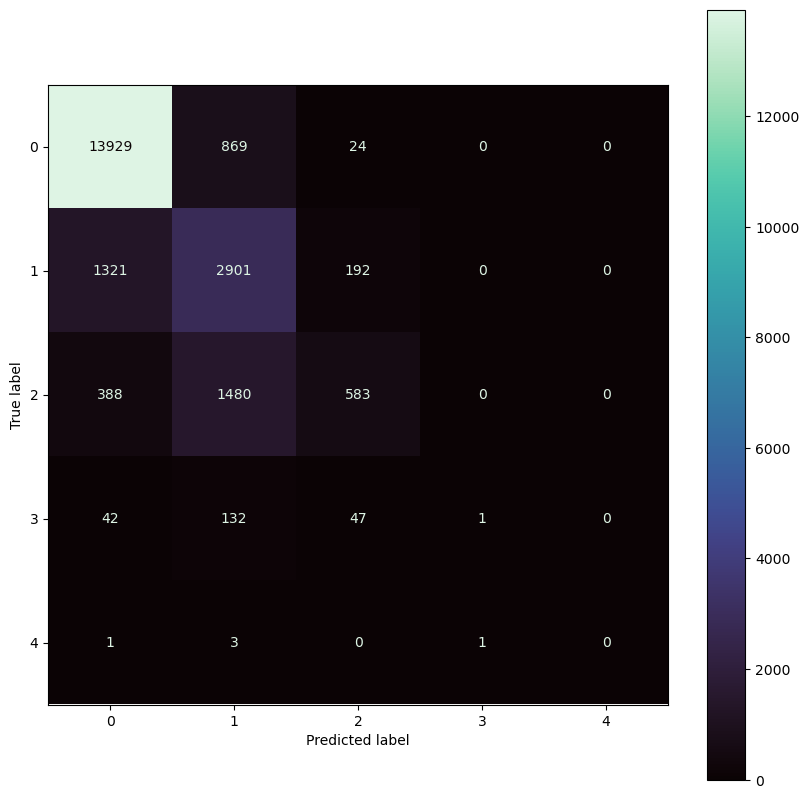

In [24]:
fig, axs = plt.subplots(figsize=(10,10))
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'mako', ax=axs)

plt.savefig('confusion_matrix.png')

#### *Our model demonstrates a commendable accuracy score of 70% in classifying resolution time. Notably, we were able to achieve a further improvement in accuracy to 79% by modifying the parameters used in the model. However, it is worth noting that the model's performance can be enhanced even further by increasing the amount of test data available for evaluation. Expanding the test dataset would likely lead to more comprehensive and robust model training, resulting in higher accuracy scores.*